In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Department codes and names
departments = {
    "6": "EECS",
    "18": "Mathematics",
    "8": "Physics",
    "7": "Biology"
}

base_url = "http://student.mit.edu/catalog/m{}a.html"

all_courses = []

for code, name in departments.items():
    url = base_url.format(code)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    
    titles = soup.find_all("h3")
    descs = soup.find_all("p")
    
    for title, desc in zip(titles, descs):
        title_text = title.get_text(strip=True)
        desc_text = desc.get_text(strip=True)

        all_courses.append({
            "title": title_text,
            "description": desc_text,
            "department": name,
            "year": "2024"
        })

# Save full dataset
df = pd.DataFrame(all_courses)
df.to_csv("../data/mit_courses_all_depts.csv", index=False)
df.head()


,title,description,department,year
0,6.100A Introduction to Computer Science Progra...,6.100A Introduction to Computer Science Progra...,EECS,2024
1,6.100B Introduction to Computational Thinking ...,6.100B Introduction to Computational Thinking ...,EECS,2024
2,6.100L Introduction to Computer Science and Pr...,6.100L Introduction to Computer Science and Pr...,EECS,2024
3,6.1010 Fundamentals of Programming,"6.1010 Fundamentals of Programming(,)Prereq:6....",EECS,2024
4,6.1020 Software Construction,6.1020 Software Construction()Prereq:6.1010Uni...,EECS,2024


In [4]:
# Reload the dataset
df = pd.read_csv("../data/mit_courses_all_depts.csv")
df.dropna(subset=["description"], inplace=True)

keywords = [
    "python", "machine learning", "data", "ai", "statistics",
    "cloud", "blockchain", "sql", "nlp", "deep learning"
]

# Prepare count structure
department_counts = {dept: {kw: 0 for kw in keywords} for dept in df["department"].unique()}

for _, row in df.iterrows():
    desc = row["description"].lower()
    dept = row["department"]
    
    for kw in keywords:
        if kw in desc:
            department_counts[dept][kw] += 1

# Convert to DataFrame
keyword_df = pd.DataFrame(department_counts).T
keyword_df


,python,machine learning,data,ai,statistics,cloud,blockchain,sql,nlp,deep learning
EECS,5,0,23,33,2,1,0,0,0,3
Mathematics,1,6,14,35,3,0,0,0,0,1
Physics,2,0,5,29,1,0,0,0,0,0
Biology,1,2,12,59,4,0,0,0,0,0


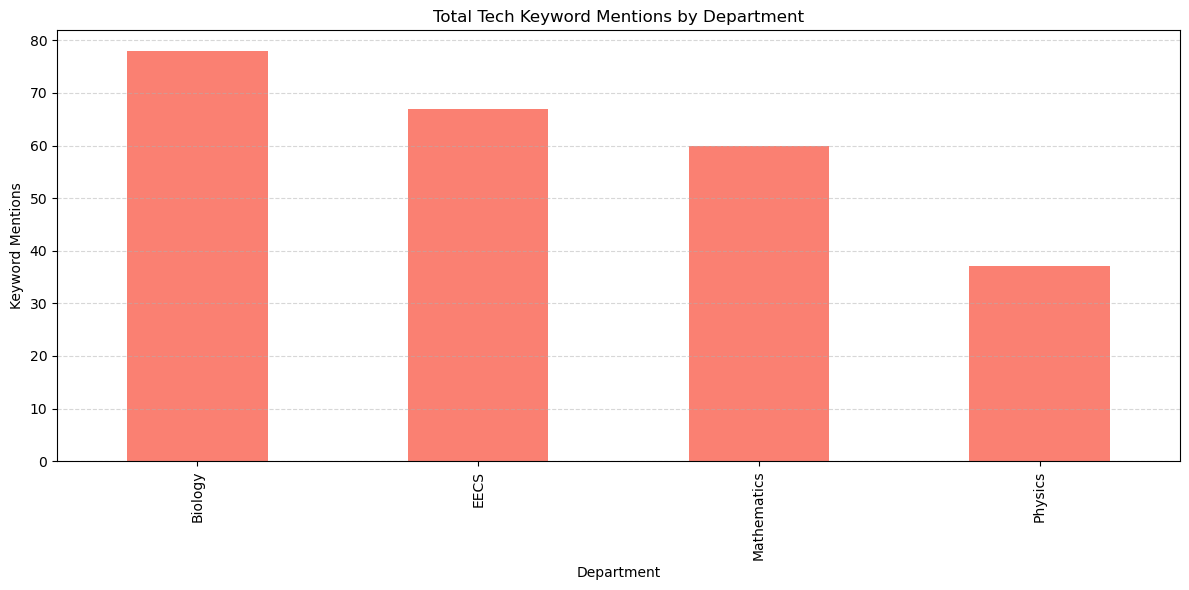

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Total mentions per department
keyword_df.sum(axis=1).sort_values(ascending=False).plot(kind="bar", color="salmon")

plt.title("Total Tech Keyword Mentions by Department")
plt.ylabel("Keyword Mentions")
plt.xlabel("Department")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
